In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Modulo 4.- Pandas 4

## 4.1. Operaciones aritméticas
Cuando realizamos operaciones entre series o dataframes,  todas las operaciones son alineadas según las etiquetas  (recordemos que en numpy la alineación es por la posición).

Consideremos dos series con la misma cantidad de  elementos pero que sólo comparten algunos índices. Si  realizamos la suma de las series los elementos, se van a  sumar sólo si comparten el mismo índice.

En el caso de que haya índices que estén presentes en una  serie pero no en la otra, los elementos se van a completar  con NaN de modo que la nueva serie tenga todos los índices  de ambas series.


In [52]:
s1 = pd.Series([5, 7, 2, 8, 0, 1])
s2 = pd.Series([17, 4, 1, 0, 0, 1], index = [3, 4, 5, 6, 7, 8])

In [54]:
s1,s2

(0    5
 1    7
 2    2
 3    8
 4    0
 5    1
 dtype: int64,
 3    17
 4     4
 5     1
 6     0
 7     0
 8     1
 dtype: int64)

In [55]:
s1 + s2

0     NaN
1     NaN
2     NaN
3    25.0
4     4.0
5     2.0
6     NaN
7     NaN
8     NaN
dtype: float64

## 4.1. Alineación
Con dataframes la alineación sucede tanto en  ﬁlas como en columnas.


In [58]:
array1 = np.random.randint(0, 50, (6,4))
array2 = np.random.randint(0, 50, (6,4))

In [59]:
array1,array2

(array([[ 2, 31, 12,  6],
        [47, 36, 44, 48],
        [42, 22, 48, 15],
        [ 8, 18, 11, 32],
        [18, 47, 46,  6],
        [35, 36, 48,  2]]),
 array([[ 4, 14, 38, 49],
        [40, 13, 16, 13],
        [48, 46, 36, 46],
        [38, 26, 30, 37],
        [ 2, 14, 27, 13],
        [29, 20, 43, 29]]))

In [60]:
df1 = pd.DataFrame(array1, columns = ['A', 'B', 'C', 'D'] )
df1

,A,B,C,D
0,2,31,12,6
1,47,36,44,48
2,42,22,48,15
3,8,18,11,32
4,18,47,46,6
5,35,36,48,2


In [61]:
df2 = pd.DataFrame(array2, index = [3, 4, 5, 6, 7, 8], columns = ['C', 'D', 'E', 'F'] )
df2

,C,D,E,F
3,4,14,38,49
4,40,13,16,13
5,48,46,36,46
6,38,26,30,37
7,2,14,27,13
8,29,20,43,29


In [62]:
df1 + df2

,A,B,C,D,E,F
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,15.0,46.0,NaN,NaN
4,NaN,NaN,86.0,19.0,NaN,NaN
5,NaN,NaN,96.0,48.0,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN


## 4.2. Operaciones
Podemos operar entre dos columnas de un  dataframe. En este caso se comparte el índice, por  lo que todos los datos se encuentran alineados.

Sólo si alguno de los valores es NaN el resultado  correspondiente también lo será.
Estas operaciones generan una nueva serie, que  se puede usar para crear una nueva columna en el  dataframe o para reemplazar una existente. Esto  se logra con una asignación directa.


In [63]:
df1['A'] + df1['B']

0    33
1    83
2    64
3    26
4    65
5    71
dtype: int32

In [64]:
# creacion de una nueva columna
df1['E'] = df1['A'] + df1['B']

df1

,A,B,C,D,E
0,2,31,12,6,33
1,47,36,44,48,83
2,42,22,48,15,64
3,8,18,11,32,26
4,18,47,46,6,65
5,35,36,48,2,71


In [65]:
# reasignacion de columna existente
df1['E'] = df1['C'] + df1['D']
df1

,A,B,C,D,E
0,2,31,12,6,18
1,47,36,44,48,92
2,42,22,48,15,63
3,8,18,11,32,43
4,18,47,46,6,52
5,35,36,48,2,50


## 4.3. Metodos asociados
Todos los operadores tienen métodos asociados que permiten  realizar la misma operación. Sin embargo, los métodos ofrecen  la posibilidad de controlar ciertos parámetros, dando más  ﬂexibilidad a la hora de hacer las operaciones.

Por ejemplo, el parámetro fill_value completa los NaN  existentes en los objetos antes de la operación. También utiliza  este valor para cualquier alineación que sea necesaria (en caso  de que no exista la etiqueta en una de las estructuras).

![imagen](metodos.png)

In [66]:
s1.add(s2)

0     NaN
1     NaN
2     NaN
3    25.0
4     4.0
5     2.0
6     NaN
7     NaN
8     NaN
dtype: float64

In [67]:
s1.add(s2, fill_value = 0)

0     5.0
1     7.0
2     2.0
3    25.0
4     4.0
5     2.0
6     0.0
7     0.0
8     1.0
dtype: float64

Los métodos asociados también permiten controlar cómo se  realiza el **broadcasting** entre dataframes y series.
En este caso la alineación por defecto es por columnas, es decir  que al hacer la operación se van a comparar los índices de la  serie con las columnas del dataframe. Si sumamos directamente  un dataframe con una de sus columnas (y los índices de las ﬁlas  son distintos de las columnas), ningún dato se va a encontrar  alineado. Para controlar que la alineación se haga por ﬁlas  podemos usar el método con el parámetro axis = index.

In [68]:
df1 + df1['A']
# equivalente a df1.add(df1['A'], axis = "columns")

,A,B,C,D,E,0,1,2,3,4,5
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
df1.add(df1['A'], axis = 'index')

,A,B,C,D,E
0,4,33,14,8,20
1,94,83,91,95,139
2,84,64,90,57,105
3,16,26,19,40,51
4,36,65,64,24,70
5,70,71,83,37,85


## 4.4. Comparaciones
También existen los operadores de comparación y  sus métodos correspondientes. El comportamiento es  similar al de los operadores y métodos aritméticos.
Estas operaciones producen estructuras de booleanos  que luego se pueden utilizar para hacer ﬁltros.
Para producir ﬁltros más complejos tenemos que ser  capaces de combinar comparaciones. Los operadores  and, or y not no funcionan con series o dataframes.  Para hacer operaciones lógicas elemento a elemento  hay que usar los operadores  &, | y ~.
Es importante usar paréntesis para agrupar  correctamente las operaciones ya que no tienen el  mismo orden de precedencia que los operadores  habituales.


In [70]:
df2

,C,D,E,F
3,4,14,38,49
4,40,13,16,13
5,48,46,36,46
6,38,26,30,37
7,2,14,27,13
8,29,20,43,29


In [71]:
df2[df2['C']>19]

,C,D,E,F
4,40,13,16,13
5,48,46,36,46
6,38,26,30,37
8,29,20,43,29


In [73]:
df2[(df2['C']>19) & (df2['E']>30)]

,C,D,E,F
5,48,46,36,46
8,29,20,43,29


# Modulo 4.- Pandas 5

## 5.1. Estadisticas
Pandas provee numerosos métodos para realizar estadísticas  sobre los datos tanto en series como en dataframes. Por defecto,  estos métodos ignoran los missing values, no teniéndolos en  cuenta a la hora de realizar los cálculos. Si se usa el parámetro  skipna = False los valores NaN se propagan al resultado ﬁnal.
Cuando se trabaja con un dataframe, estas funciones se calculan  por columna y sólo las que tienen números y devuelven una serie.

Entre estos métodos podemos encontrar: **sum, mean, std, var,  mode, median, count, min, max, prod**

In [74]:
data.mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [75]:
# promedio y desviacion standar de las edades
data['Age'].mean(), data['Age'].std()

(29.69911764705882, 14.526497332334044)

In [76]:
# promedio de edad de los pasajeros de primera clase
data.loc[data["Pclass"] == 1, 'Age'].mean()

38.233440860215055

In [77]:
# promedio de edad de las mujeres de primera clase
data.loc[(data["Pclass"] == 1) & (data["Sex"] == 'female') , 'Age'].mean()

34.61176470588235

In [78]:
# contar cantidad de varones
data.loc[data["Sex"] == 'male', "Sex"].count()

577

In [79]:
data['Age'].min(), data['Age'].max()

(0.42, 80.0)

In [80]:
# cantidad de elementos unicos en cada columna
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## 5.2. describe()
El método describe permite ver un resumen de las  estadísticas principales de cada columna.
Cuando la columna es **numérica** devuelve: cantidad de  elementos válidos, promedio, desviación standard,  mínimo, máximo y cuartiles.

Cuando la columna **no es numérica** devuelve: cantidad  de elementos válidos, cantidad de elementos únicos y el  elemento más frecuente y su frecuencia.

Cuando el dataframe incluye **columnas numéricas y no  numéricas**, el método sólo muestra el resumen de las  columnas numéricas. Este comportamiento se puede  controlar con los parámetros include/exclude.

In [81]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [82]:
data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

## 5.3. aggregate()
El método aggregate (con el alias agg) permite hacer  un resumen con las funciones de agregación que  querramos. Se le puede pasar como argumentos un  string con el nombre de la función o la función en sí  (que puede incluir funciones de numpy).
En principio estas funciones se calculan sobre todas las  columnas, lo que puede causar resultados inesperados.  Por ejemplo, la función sum aplicada a strings, los  concatena todos. Se pueden seleccionar las columnas  numéricas con el método select_dtypes.

In [83]:
data.select_dtypes('number').aggregate(['sum', 'min', np.max, 'var'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
sum,397386.0,342.000000,2057.000000,21205.170000,466.000000,340.000000,28693.949300
min,1.0,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
amax,891.0,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
var,66231.0,0.236772,0.699015,211.019125,1.216043,0.649728,2469.436846


## 5.4. value_counts()
El método value_counts para series permite encontrar  una distribución de frecuencias de los valores únicos que  contiene. Devuelve una serie cuyos índices son los valores  únicos de la serie original y sus valores son las respectivas  frecuencias.

El resultado está ordenado de mayor a menor, de modo  que el primer elemento es el más frecuente.
Se puede hacer que se ordene en orden ascendente con  el parámetro ascending.
El parámetro normalize permite obtener las proporciones  de cada valor.

In [6]:
s = pd.Series([1, 2, 1, 3, 5, 2, 1, 1, 4, 4, 1])
s.value_counts()

1    5
2    2
4    2
3    1
5    1
dtype: int64

In [85]:
s.value_counts(normalize = True, sort = False)

1    0.454545
2    0.181818
3    0.090909
4    0.181818
5    0.090909
dtype: float64

In [86]:
s.value_counts(normalize = True, sort = True)

1    0.454545
2    0.181818
4    0.181818
3    0.090909
5    0.090909
dtype: float64

In [7]:
# para mostrar el resultado en formato de %
s1 =s.value_counts(normalize = True, sort = True)
s2 =pd.DataFrame(s1,columns = ['Columna 1'])

s2= s2['Columna 1'] .apply(lambda x: format(x, '.2%'))
s2

1    45.45%
2    18.18%
4    18.18%
3     9.09%
5     9.09%
Name: Columna 1, dtype: object

# Modulo 5.- Pandas 6

## 6.1. Groupby
Como hemos visto, es muy fácil hacer estadísticas sobre  columnas de un dataframe. Pero muchas veces estamos  interesados en realizar estadísticas a subconjuntos de  esos datos según la categoría a la que pertenezcan. Por  ejemplo, encontrar el promedio de edad para hombres y  mujeres, o para hombres y mujeres divididos también por  la clase en la que viajaban.

Para este tipo de operaciones existe el método groupby,  que permite hacer los agrupamientos de una forma  eﬁciente y sencilla. Este método crea una estructura de  datos particular a la que le podemos aplicar diferentes  operaciones estadísticas.      
**Sólo cuando aplicamos estas  operaciones se devuelve un dataframe con la información.**

In [8]:
# seguinos usando el dataset de Titanic
data = pd.read_csv('titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


El método groupby sólo crea  la estructura de datos a la que se le puede  aplicar la función de agregación.

In [9]:
data.groupby('Sex')

In [10]:
data.groupby('Sex').count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


Si la operación a realizar solamente admite números, se aplica a las  columnas numéricas exclusivamente.


In [11]:
data.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


Si queremos restringir el resultado a ciertas columnas podemos  hacerlo de varias maneras:
- Una es seleccionar la columna de interés luego de hacer las  operaciones.
- Otra es seleccionar las columnas necesarias antes de hacer el groupby (se debe incluir la columna con la que agrupar).
- Y la otra opción es seleccionar la columna de interés después de  hacer el groupby, pero antes de aplicar la función de agregación.

El tipo de estructura a devolver puede  variar según el método de selección

In [12]:
data.groupby('Sex').mean()['Age']

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [13]:
# promedio de edad segun sexo
data[['Age', 'Sex']].groupby('Sex').mean()

,Age
Sex,
female,27.915709
male,30.726645


In [14]:
data.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [15]:
# maxima de edad en cada clase
data[['Age', 'Pclass']].groupby('Pclass').max()

,Age
Pclass,
1,80.0
2,70.0
3,74.0


In [16]:
# cantidad de valores no nulos por columna agrupados por sobrevivencia
data.groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [17]:
# cantidad de filas agrupadas por sobrevivencia
data.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

En caso de querer realizar varias operaciones a los mismos  grupos se puede utilizar aggregate (o su alias, agg).

In [19]:
data[['Age', 'Pclass']].groupby('Pclass').agg(['min', 'max','mean','std'])

Age                            
         min   max       mean        std
Pclass                                  
1       0.92  80.0  38.233441  14.802856
2       0.67  70.0  29.877630  14.001077
3       0.42  74.0  25.140620  12.495398

También se puede agrupar por  varias categorías, haciendo  agrupamientos más especíﬁcos.  Por ejemplo, el promedio de edad  discriminando tanto por clase  como por sexo.

In [20]:
data[['Pclass', 'Sex', 'Age']].groupby(['Pclass', 'Sex']).mean()

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [21]:
# proporcion de supervivencia por clase y por sexo
data[['Pclass', 'Sex', 'Survived']].groupby(['Pclass', 'Sex']).mean()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

In [23]:
print(data[['Pclass', 'Survived']].groupby(['Pclass']).count())
print('------------------------')
print(data.count())
print('------------------------')
print(data[['Pclass', 'Survived']].groupby(['Pclass']).mean())
print('------------------------')
print(data.groupby(['Survived']).mean())

        Survived
Pclass          
1            216
2            184
3            491
------------------------
PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64
------------------------
        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363
------------------------
          PassengerId    Pclass        Age     SibSp     Parch       Fare
Survived                                                                 
0          447.016393  2.531876  30.626179  0.553734  0.329690  22.117887
1          444.368421  1.950292  28.343690  0.473684  0.464912  48.395408


# Modulo 5.- Pandas 7

## 7.1. Gráficos
Pandas ofrece muchas facilidades para hacer gráﬁcos de  manera sencilla. Se basa en Matplotlib, el principal  módulo de gráﬁcos de Python, que estudiaremos la  próxima clase, para realizar los gráﬁcos.

Podemos acceder a las funcionalidades para graﬁcar a  través del método plot. Permite acceder a distintos tipos  de gráﬁcos de forma sencilla. Por ejemplo, se pueden  hacer histogramas con plot.hist(), gráﬁcos de barras  con plt.bar, y de torta con plt.pie().

### 7.1.1. Histogramas
Un histograma es una representación  de la distribución de un conjunto de  números. El rango se divide en barras  y la altura de la barra es proporcional a  la cantidad de datos que entran en el  rango de la barra (ancho). Se puede  deﬁnir la cantidad de barras a mostrar.

<AxesSubplot:ylabel='Frequency'>

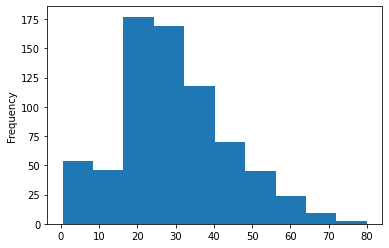

In [24]:
data['Age'].plot.hist()

Los métodos vienen con algunos parámetros para controlar el  aspecto del gráﬁco.

<AxesSubplot:title={'center':'Distribucion de edades'}, ylabel='Frequency'>

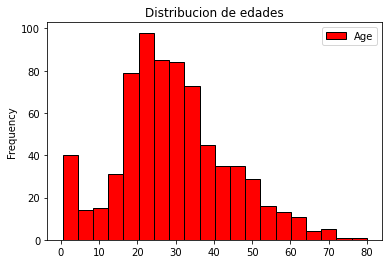

In [25]:
data['Age'].plot.hist(bins = 20, title = 'Distribucion de edades', legend = True, color = 'red', edgecolor = 'black' )

### 7.1.2. Gráfico de Barras
Este tipo de gráﬁcos muestra barras de altura variable. En general, son útiles para  mostrar estadísticas tomadas por categorías por medio de groupby.

<AxesSubplot:xlabel='Sex'>

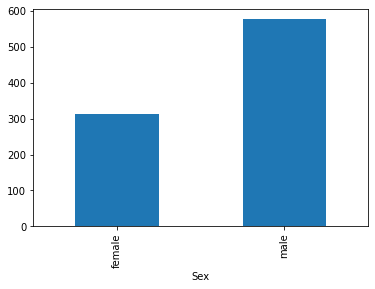

In [27]:
data.groupby('Sex').size().plot.bar()

<AxesSubplot:xlabel='Sex'>

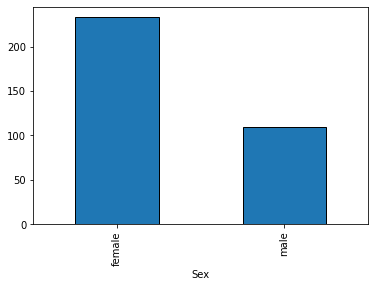

In [30]:
data.groupby('Sex')['Survived'].sum().plot.bar(edgecolor = 'black')

### 7.1.3. Gráfico de Torta
Otra forma de representar  este tipo de información  es el gráﬁco de tortas,  donde el área de la cuña  es proporcional al número  que representa.

<AxesSubplot:title={'center':'Proporcion de hombres y mujeres'}, ylabel='None'>

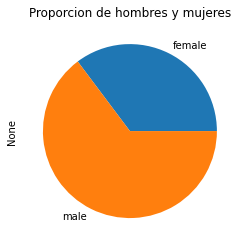

In [31]:
data.groupby('Sex').size().plot.pie(title = 'Proporcion de hombres y mujeres')

### 7.1.3. Gráfico de Lineas
Si los datos están ordenados se puede usar plot  para representarlos sobre una línea en donde el  eje x es el índice de la serie y el eje y es el valor.

Si este método se aplica sobre un dataframe, las  columnas numéricas se muestran en el mismo  gráﬁco compartiendo el eje x. A continuación  creamos un dataset para practicar.



In [32]:
arr = np.random.randn(1000,4).cumsum(axis = 0)
arr

array([[ 1.34088435e+00, -7.26365252e-01,  8.82803105e-01,
         8.47840848e-01],
       [ 1.95270394e+00, -2.65805094e-01, -2.06315143e+00,
        -9.58939098e-03],
       [ 2.30191640e+00,  1.70045038e+00, -2.22668625e+00,
         1.81749523e+00],
       ...,
       [-1.23840534e+01, -2.90523633e+01,  3.42655888e+01,
        -2.56867356e+01],
       [-1.31607410e+01, -3.02012088e+01,  3.37091156e+01,
        -2.55563856e+01],
       [-1.35353564e+01, -3.03099577e+01,  3.28290526e+01,
        -2.66235786e+01]])

In [33]:
df = pd.DataFrame(arr, columns = ['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,1.340884,-0.726365,0.882803,0.847841
1,1.952704,-0.265805,-2.063151,-0.009589
2,2.301916,1.700450,-2.226686,1.817495
3,3.466218,1.021051,-1.787520,1.762945
4,3.433600,-0.815154,-2.536631,1.996180
...,...,...,...,...
995,-14.635804,-30.920496,33.426863,-24.606312
996,-12.985528,-29.847373,33.290967,-24.963137
997,-12.384053,-29.052363,34.265589,-25.686736
998,-13.160741,-30.201209,33.709116,-25.556386


<AxesSubplot:>

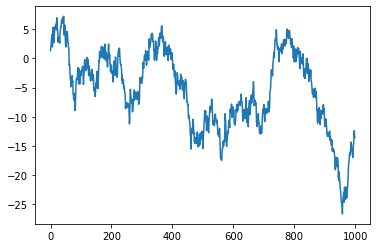

In [34]:
df['A'].plot()

<AxesSubplot:>

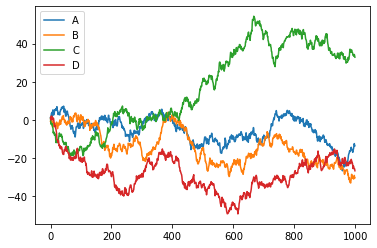

In [35]:
df.plot()

# Modulo 5.- Pandas 8

## 8.1. Missing values
Tener un dataset con missing values es un caso muy  común a la hora de trabajar con datos. Puede suceder  que algunos datos se hayan perdido, por lo que no  estén disponibles, o que no se hayan recolectado  correctamente. Incluso puede suceder que la  información jamás haya existido.

Existen varias técnicas a la hora de trabajar con  missing values y pandas ofrece funcionalidades para  manipularlos.

Para representar missing values pandas usa  principalmente el valor np.nan (NaN: Not a  Number). Este es un valor especial dentro de  los números ﬂotantes.

In [36]:
np.nan
type(np.nan)

float

Como np.nan es un ﬂotante, cuando se  encuentra en una columna de enteros,  toda la columna es promovida al tipo de  dato ﬂotante.

In [37]:
df = pd.DataFrame({'A': [1, 3, 5, 4, 2], 'B': [8, 2, np.nan, 1, 5]})
df

,A,B
0,1,8.0
1,3,2.0
2,5,NaN
3,4,1.0
4,2,5.0


A la hora de hacer cálculos entre NaN y otros valores,  el resultado siempre se promueve a NaN.

Sin embargo, algunos métodos permiten controlar  cómo se trata los missing values. Los métodos  asociados a los operadores permite deﬁnir un valor a  reemplazar para NaN antes de realizar la operación.

In [38]:
df['A'] + df['B']

0    9.0
1    5.0
2    NaN
3    5.0
4    7.0
dtype: float64

In [39]:
df['A'].add(df['B'])

0    9.0
1    5.0
2    NaN
3    5.0
4    7.0
dtype: float64

In [40]:
df['A'].add(df['B'], fill_value = 0)

0    9.0
1    5.0
2    5.0
3    5.0
4    7.0
dtype: float64

A su vez, las funciones de agregación también  permiten controlar cómo se trata NaN.
Por defecto son ignorados, pero se puede controlar  con el parámetro skipna.

In [41]:
df.mean()

A    3.0
B    4.0
dtype: float64

In [42]:
df.mean(skipna = False)

A    3.0
B    NaN
dtype: float64

Otro valor especial dentro de los números  ﬂotantes es np.inf (que se usa para  representar el inﬁnito, no missing values).

In [43]:
np.inf
type(np.inf)

float

El otro valor que se usa para representar  missing values es None, que es un tipo de  dato de Python con un único valor.


In [44]:
type(None)

NoneType

## 8.2. isna
Para detectar missing values está el método
isna (o su alias, isnull).

Este método mapea los datos del dataframe  o serie a booleanos. Sólo mapea np.nan y  None a True y cualquier otro valor a False.

Alternativamente, está el método notna (y su  alias, notnull) para hacer el mapeo inverso.

In [45]:
df.isna()

,A,B
0,False,False
1,False,False
2,False,True
3,False,False
4,False,False


In [46]:
df.notna()

,A,B
0,True,True
1,True,True
2,True,False
3,True,True
4,True,True


Teniendo en cuenta que True se  trata como 1 y False como 0,  podemos realizar estadísticas sobre  la cantidad de missing values.

In [47]:
# cantidad de NaN por columna en el dataset del Titanic
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [48]:
# columnas que presentan NaN
data.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

## 8.3. dropna
Una forma de tratar los NaN es simplemente  descartarlos.

El método dropna elimina las ﬁlas que  contengan al menos un NaN. Se puede  limitar las columnas a considerar con el  parámetro subset.

In [51]:
data.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


## 8.4. fillna
Para no perder tanta información, también  es posible reemplazar los NaN por un valor  que consideremos apropiado con el método  fillna.

Por ejemplo, reemplazar los NaN en la  columna Age por el promedio de edad.


In [52]:
data['Age'].fillna(data['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

## 8.5. interpolate
Cuando tenemos datos ordenados  (por ejemplo una serie de tiempo) se  pueden interpolar los datos faltantes  con el método interpolate.

<AxesSubplot:>

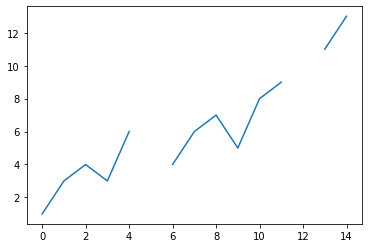

In [53]:
s = pd.Series([1, 3, 4, 3, 6, np.nan, 4, 6, 7, 5, 8, 9, np.nan, 11, 13])
s.plot()

Por defecto hace una interpolación  lineal, pero se pueden especiﬁcar  otros métodos.

0      1.0
1      3.0
2      4.0
3      3.0
4      6.0
5      NaN
6      4.0
7      6.0
8      7.0
9      5.0
10     8.0
11     9.0
12     NaN
13    11.0
14    13.0
dtype: float64


<AxesSubplot:>

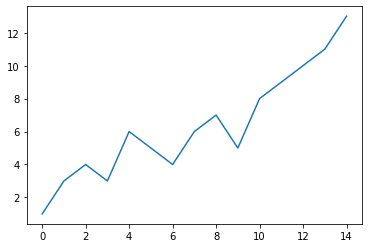

In [55]:
print(s)
s.interpolate()
s.interpolate().plot()

<AxesSubplot:>

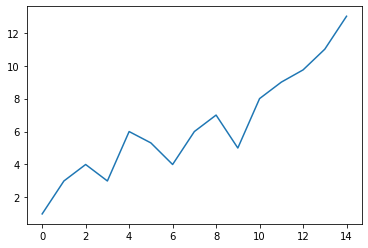

In [56]:
s.interpolate(method = 'quadratic')
s.interpolate(method = 'quadratic').plot()

# Modulo 5.- Pandas 9

## 9.1. Strings
Existen numerosos métodos para trabajar con strings en  objetos tipo Series e Index (no aplica a Dataframes).

En general, tienen el mismo nombre que los métodos de  python para strings y están agrupados en el atributo  str. Así es posible hacer operaciones sobre todos los  elementos de la estructura con un único comando.

Por ejemplo, para cambiar entre mayúsculas y  minúsculas existen lower, upper, title y swapcase.

In [57]:
data['Name'].str.lower()

0                                braund, mr. owen harris
1      cumings, mrs. john bradley (florence briggs th...
2                                 heikkinen, miss. laina
3           futrelle, mrs. jacques heath (lily may peel)
4                               allen, mr. william henry
                             ...                        
886                                montvila, rev. juozas
887                         graham, miss. margaret edith
888             johnston, miss. catherine helen "carrie"
889                                behr, mr. karl howell
890                                  dooley, mr. patrick
Name: Name, Length: 891, dtype: object

In [58]:
data['Name'].str.upper()

0                                BRAUND, MR. OWEN HARRIS
1      CUMINGS, MRS. JOHN BRADLEY (FLORENCE BRIGGS TH...
2                                 HEIKKINEN, MISS. LAINA
3           FUTRELLE, MRS. JACQUES HEATH (LILY MAY PEEL)
4                               ALLEN, MR. WILLIAM HENRY
                             ...                        
886                                MONTVILA, REV. JUOZAS
887                         GRAHAM, MISS. MARGARET EDITH
888             JOHNSTON, MISS. CATHERINE HELEN "CARRIE"
889                                BEHR, MR. KARL HOWELL
890                                  DOOLEY, MR. PATRICK
Name: Name, Length: 891, dtype: object

In [59]:
data['Name'].str.title()

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [60]:
data['Name'].str.swapcase()

0                                bRAUND, mR. oWEN hARRIS
1      cUMINGS, mRS. jOHN bRADLEY (fLORENCE bRIGGS tH...
2                                 hEIKKINEN, mISS. lAINA
3           fUTRELLE, mRS. jACQUES hEATH (lILY mAY pEEL)
4                               aLLEN, mR. wILLIAM hENRY
                             ...                        
886                                mONTVILA, rEV. jUOZAS
887                         gRAHAM, mISS. mARGARET eDITH
888             jOHNSTON, mISS. cATHERINE hELEN "cARRIE"
889                                bEHR, mR. kARL hOWELL
890                                  dOOLEY, mR. pATRICK
Name: Name, Length: 891, dtype: object

El método **split** permite separar los  strings en partes. Por defecto, usa el  espacio en blanco como separador, pero  podemos deﬁnir cualquier carácter o  substring para usar como separador.      
Para  cada elemento devuelve una lista con los  strings que fueron separados.

In [62]:
data['Name'].str.split()

0                           [Braund,, Mr., Owen, Harris]
1      [Cumings,, Mrs., John, Bradley, (Florence, Bri...
2                             [Heikkinen,, Miss., Laina]
3      [Futrelle,, Mrs., Jacques, Heath, (Lily, May, ...
4                          [Allen,, Mr., William, Henry]
                             ...                        
886                            [Montvila,, Rev., Juozas]
887                    [Graham,, Miss., Margaret, Edith]
888       [Johnston,, Miss., Catherine, Helen, "Carrie"]
889                           [Behr,, Mr., Karl, Howell]
890                              [Dooley,, Mr., Patrick]
Name: Name, Length: 891, dtype: object

El método **count** cuenta cuantas veces  aparece un substring en cada elemento.!

In [64]:
data['Name'].str.count('Mr.')

0      1
1      1
2      0
3      1
4      1
      ..
886    0
887    0
888    0
889    1
890    1
Name: Name, Length: 891, dtype: int64

El método **contains** devuelve True o  False según cada string contenga o no  cierto substring.

In [65]:
data['Name'].str.contains('Mr.')

0       True
1       True
2      False
3       True
4       True
       ...  
886    False
887    False
888    False
889     True
890     True
Name: Name, Length: 891, dtype: bool

Los métodos **startswith** y **endswith**  permiten saber si cada string empieza  o termina con cierto preﬁjo o suﬁjo.

In [66]:
# cantidad de strings que empiezan con "Anderson"
data['Name'].str.startswith('Andersson').sum()

9

In [67]:
# existe algun string que empieze con 'Perez'?
data['Name'].str.startswith('Perez').any()

False

El método **len** calcula la cantidad de  caracteres de cada string, como si  estuviéramos aplicando la función  len a cada uno.

In [68]:
data['Name'].str.len()

0      23
1      51
2      22
3      44
4      24
       ..
886    21
887    28
888    40
889    21
890    19
Name: Name, Length: 891, dtype: int64

También ha varios métodos para  comprobar si los strings están  compuestos por cierto tipo de  caracteres.

Los métodos **isdigit, isnumeric  e isdecimal** permiten chequear  que sean caracteres numéricos;  isalpha que sean letras; **isalnum**  que sean letras o números;  **islower, isupper e  istitle** que  cumplan con el formato.

In [69]:
s = pd.Series(['abc', 'ABC', '007', 'abc007'])
s

0       abc
1       ABC
2       007
3    abc007
dtype: object

In [70]:
s.str.isalpha()

0     True
1     True
2    False
3    False
dtype: bool

In [71]:
s.str.islower()

0     True
1    False
2    False
3     True
dtype: bool

In [72]:
s.str.isnumeric()

0    False
1    False
2     True
3    False
dtype: bool

El atributo str también permite  hacer indexación y slices sobre los  strings usando corchetes.
En caso de indexar una posición  mayor a la longitud del string se  devuelve NaN.

In [73]:
data['Name'].str[0:3]

0      Bra
1      Cum
2      Hei
3      Fut
4      All
      ... 
886    Mon
887    Gra
888    Joh
889    Beh
890    Doo
Name: Name, Length: 891, dtype: object

In [74]:
data['Name'].str[40]

0      NaN
1        g
2      NaN
3        e
4      NaN
      ... 
886    NaN
887    NaN
888    NaN
889    NaN
890    NaN
Name: Name, Length: 891, dtype: object

# Modulo 5.- Pandas 10

## 10.1. Fechas
Para representar fechas y horas se utiliza un tipo  de dato especial: **datetime64**. Y para representar  intervalos de tiempo su usa **timedelta64**.       
Son  tipos de datos que incorporan características y  operaciones propias de trabajar y medir tiempos.

Usualmente cuando leemos un archivo las fechas  se representan como strings. Para convertirlo a  datetime64 se usa la función  pd.to_datetime,  que permite controlar el formato con el que se va a  leer la información, que puede venir de diferentes  formas:**yyyy-mm-dd, dd/mm/yy, Month dd,  yyyy, etc.**

Para esta sección vamos a usar de ejemplo el archivo **GoldPrice.csv**.  Este archivo contiene casi 10 años de registros en el precio del oro.  La primera columna tiene strings que representan las fechas en el  formato **"Sep 11, 2020"**. 

Podemos convertir la columna al tipo de dato  datetime con pd.to_datetime.

In [77]:
gold = pd.read_csv('GoldPrice.csv')
gold

,Date,Price,Open,High,Low
0,"Aug 01, 2018",1216.6,1223.40,1223.4,1216.20
1,"Jul 31, 2018",1223.7,1220.40,1228.1,1213.00
2,"Jul 30, 2018",1221.3,1222.50,1223.9,1218.10
3,"Jul 27, 2018",1222.2,1223.50,1226.8,1216.70
4,"Jul 26, 2018",1225.3,1227.80,1227.8,1227.80
...,...,...,...,...,...
9766,"Jan 03, 1980",625.0,627.00,640.0,603.00
9767,"Jan 02, 1980",575.5,562.50,577.0,558.00
9768,"Dec 31, 1979",533.6,527.88,534.5,527.88
9769,"Dec 28, 1979",517.8,516.00,517.8,510.40


In [78]:
gold.dtypes

Date      object
Price    float64
Open     float64
High     float64
Low      float64
dtype: object

In [79]:
gold['Date']=pd.to_datetime(gold['Date'])
gold

,Date,Price,Open,High,Low
0,2018-08-01,1216.6,1223.40,1223.4,1216.20
1,2018-07-31,1223.7,1220.40,1228.1,1213.00
2,2018-07-30,1221.3,1222.50,1223.9,1218.10
3,2018-07-27,1222.2,1223.50,1226.8,1216.70
4,2018-07-26,1225.3,1227.80,1227.8,1227.80
...,...,...,...,...,...
9766,1980-01-03,625.0,627.00,640.0,603.00
9767,1980-01-02,575.5,562.50,577.0,558.00
9768,1979-12-31,533.6,527.88,534.5,527.88
9769,1979-12-28,517.8,516.00,517.8,510.40


In [80]:
gold.dtypes

Date     datetime64[ns]
Price           float64
Open            float64
High            float64
Low             float64
dtype: object

Los objetos de tipo datetime tienen varios atributos, como **year,  month, day, hour**. Para acceder a los atributos y métodos  propios del tipo de dato datetime se utiliza el atributo dt.

In [82]:
gold['Date'].dt.year

0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
9766    1980
9767    1980
9768    1979
9769    1979
9770    1979
Name: Date, Length: 9771, dtype: int64

In [83]:
gold['Date'].dt.month

0        8
1        7
2        7
3        7
4        7
        ..
9766     1
9767     1
9768    12
9769    12
9770    12
Name: Date, Length: 9771, dtype: int64

In [84]:
gold['Date'].dt.day

0        1
1       31
2       30
3       27
4       26
        ..
9766     3
9767     2
9768    31
9769    28
9770    27
Name: Date, Length: 9771, dtype: int64

Podemos encontrar la fecha más antigua con **min** y la más reciente  con **max**. La resta de fechas da una instancia de **Timedelta**, que  representa intervalos de tiempo. No se puede sumar dos fechas,  pero sí se puede sumar un Datetime con un Timedelta.

In [85]:
gold['Date'].min(), gold['Date'].max()

(Timestamp('1979-12-27 00:00:00'), Timestamp('2018-08-01 00:00:00'))

In [86]:
gold['Date'].max()- gold['Date'].min()

Timedelta('14097 days 00:00:00')

Cuando tenemos datos relacionados a fechas, podemos  utilizar la serie de tiempo como índice. Esto le da mucha  funcionalidad ya que podemos seleccionar datos  reﬁriéndonos a las fechas.
Para utilizar la columna de fechas como índice podemos  usar set_index. En este caso pandas crea un tipo de  dato especial, el DatetimeIndex. Como sólo se trata de  fechas podemos acceder a los métodos directamente,  sin pasar por el atributo dt.
Ahora podemos seleccionar los datos según criterios  temporales, como todos los datos de un año o de todos  los lunes, usando indexing y ﬁltros.

In [87]:
gold

,Date,Price,Open,High,Low
0,2018-08-01,1216.6,1223.40,1223.4,1216.20
1,2018-07-31,1223.7,1220.40,1228.1,1213.00
2,2018-07-30,1221.3,1222.50,1223.9,1218.10
3,2018-07-27,1222.2,1223.50,1226.8,1216.70
4,2018-07-26,1225.3,1227.80,1227.8,1227.80
...,...,...,...,...,...
9766,1980-01-03,625.0,627.00,640.0,603.00
9767,1980-01-02,575.5,562.50,577.0,558.00
9768,1979-12-31,533.6,527.88,534.5,527.88
9769,1979-12-28,517.8,516.00,517.8,510.40


In [88]:
gold.set_index('Date', inplace = True)
gold

,Price,Open,High,Low
Date,,,,
2018-08-01,1216.6,1223.40,1223.4,1216.20
2018-07-31,1223.7,1220.40,1228.1,1213.00
2018-07-30,1221.3,1222.50,1223.9,1218.10
2018-07-27,1222.2,1223.50,1226.8,1216.70
2018-07-26,1225.3,1227.80,1227.8,1227.80
...,...,...,...,...
1980-01-03,625.0,627.00,640.0,603.00
1980-01-02,575.5,562.50,577.0,558.00
1979-12-31,533.6,527.88,534.5,527.88


In [89]:
gold.index

DatetimeIndex(['2018-08-01', '2018-07-31', '2018-07-30', '2018-07-27',
               '2018-07-26', '2018-07-25', '2018-07-24', '2018-07-23',
               '2018-07-20', '2018-07-19',
               ...
               '1980-01-10', '1980-01-09', '1980-01-08', '1980-01-07',
               '1980-01-04', '1980-01-03', '1980-01-02', '1979-12-31',
               '1979-12-28', '1979-12-27'],
              dtype='datetime64[ns]', name='Date', length=9771, freq=None)

In [90]:
# seleccionar el año 2016
gold.loc['2016']

,Price,Open,High,Low
Date,,,,
2016-12-30,1150.00,1162.0,1162.00,1151.0
2016-12-29,1156.40,1143.8,1158.80,1143.6
2016-12-28,1139.40,1141.2,1141.20,1138.0
2016-12-27,1137.30,1134.3,1142.20,1134.3
2016-12-26,1134.55,1135.0,1136.05,1134.0
...,...,...,...,...
2016-01-08,1097.80,1111.1,1111.10,1093.0
2016-01-07,1107.70,1091.6,1109.40,1091.6
2016-01-06,1091.90,1081.6,1093.70,1081.6


In [91]:
# registros posteriores a una fecha
gold[gold.index > '2018-4-20' ]

,Price,Open,High,Low
Date,,,,
2018-08-01,1216.6,1223.4,1223.4,1216.2
2018-07-31,1223.7,1220.4,1228.1,1213.0
2018-07-30,1221.3,1222.5,1223.9,1218.1
2018-07-27,1222.2,1223.5,1226.8,1216.7
2018-07-26,1225.3,1227.8,1227.8,1227.8
...,...,...,...,...
2018-04-27,1320.3,1315.3,1321.7,1312.8
2018-04-26,1316.3,1315.7,1315.8,1315.7
2018-04-25,1321.2,1324.0,1325.0,1320.0


In [92]:
# seleccionar todos los lunes del dataset
gold[gold.index.dayofweek == 0 ]

,Price,Open,High,Low
Date,,,,
2018-07-30,1221.3,1222.50,1223.9,1218.10
2018-07-23,1224.0,1222.00,1222.0,1222.00
2018-07-16,1238.1,1242.70,1243.8,1242.70
2018-07-09,1258.1,1258.20,1262.3,1257.70
2018-07-02,1239.8,1249.90,1249.9,1239.80
...,...,...,...,...
1980-01-28,638.0,634.00,643.0,606.00
1980-01-21,825.5,875.00,875.0,812.00
1980-01-14,671.0,672.00,672.0,650.00


# Modulo 6.- Matplotlib 1

## 1.1. Visualización de datos
La **visualización de datos** es la representación de  los datos a través de gráﬁcos de distinto tipo.      
Es un  tipo de representación mucho más fácil de entender  para una persona que otras formas de representar  información, como las tablas, más aún cuando la  cantidad de datos es grande.
Las representaciones visuales permiten descubrir y  comunicar relaciones complejas entre los datos y son  una herramienta importante del análisis de datos  moderno.

**Matplotlib** es un módulo de bajo nivel para  visualización de datos. Está hecho sobre Numpy,  por lo que es ideal para hacer gráﬁcos a partir  de datos alojados en arrays. Por esta razón se  integra perfectamente al ecosistema de  módulos de Python.
Se dice que es de bajo nivel porque permite  controlar cualquier aspecto de un gráﬁco, ya que  tiene numerosas funciones para conﬁgurar  cualquier cosa que uno quiera. Por esto mismo  sirve de base a otros módulos (de alto nivel) que  están construidos sobre Matplotlib, como  Seaborn o Cartopy.

## 1.2. Interfaces
Matplotlib ofrece dos interfaces (o formas de  interactuar con las funcionalidades):
- La interfaz “pyplot”.
- La interfaz orientada a objetos.

Las dos interfaces dan acceso a la misma  funcionalidad, sin embargo, la primera es más  cómoda a la hora de realizar gráﬁcos sencillos  de forma rápida mientras que la segunda es  algo más conveniente a la hora de hacer  gráﬁcos complejos.

### 1.2.1. Interfaz Pyplot
Dentro de matplotlib encontramos el módulo  pyplot que se suele importar bajo el alias plt.

***import matplotlib.pyplot as plt***

El módulo contiene numerosas funciones para  hacer distintos tipos de gráﬁcos a partir de los  datos.

La función **plot** es una de las funciones básicas y sirve  para graﬁcar puntos en 2d y unirlos con líneas (por  defecto una línea continua azul). Recibe como  parámetros dos arrays, uno para las coordenadas x y  otro para las coordenadas y de los datos.
En caso de que se provea un solo array, este se usa  como coordenadas **y** mientras que las coordenadas x se  defaultean a números enteros empezando por cero.

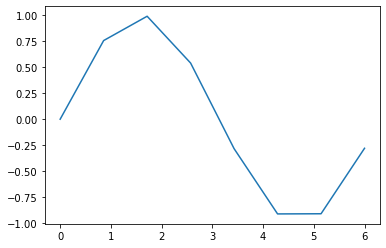

In [3]:
N = 8
x = np.linspace(0,6,N)
y = np.sin(x)
plt.plot(x, y)

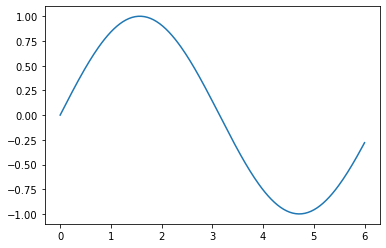

In [4]:
N = 200
x = np.linspace(0,6,N)
y = np.sin(x)
plt.plot(x, y)

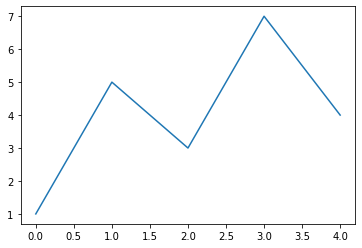

In [5]:
plt.plot([1,5,3,7,4])

# Modulo 6.- Matplotlib 2

## 2.1. Format String
Adicionalmente a los datos, a la función plot se le puede  pasar un string para controlar algunos aspectos básicos  del gráﬁco de forma rápida y sencilla. Este format string  puede contener información para controlar tres aspectos:
- Marcador: controla el tipo de marca que se usa para  señalar los datos, como por ejemplo si los vamos a  marcar con círculos, cuadrados, triángulos, puntos,  estrellas, etc.
- Línea: el tipo de línea a utilizar para unir los puntos:  continua, punteada, rayada, raya-punto o ninguna.
- Color: algunos colores básicos que podemos usar para  el conjunto de datos

### 2.2.1. Marcador
Cada opción tiene un carácter que lo representa y puede estar presente o no en el format string.  Las opciones para el marcador son:
![imagen](marcadores.png)

### 2.2.2. Linea y Color
Los caracteres para el tipo de línea y para el color se muestran a continuación.  Si el carácter de la línea se omite, solo graﬁcará los puntos.
![imagen](lineas.png)

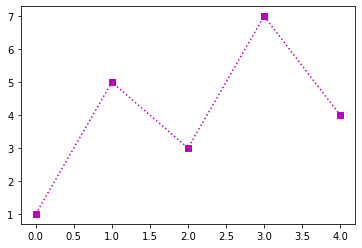

In [2]:
plt.plot([1,5,3,7,4], 's:m')

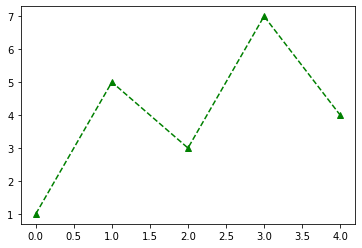

In [3]:
plt.plot([1,5,3,7,4], '^--g')

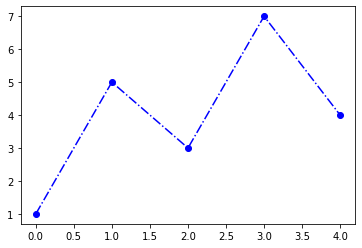

In [4]:
plt.plot([1,5,3,7,4], 'o-.b')

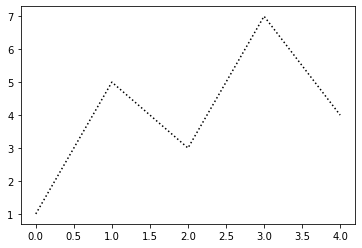

In [5]:
plt.plot([1,5,3,7,4], ':k')

## 2.3. Argumentos
Si bien es posible controlar algunos  aspectos básicos con el format  string, para un control más completo  de los aspectos del gráﬁco debemos  usar los parámetros de la función.

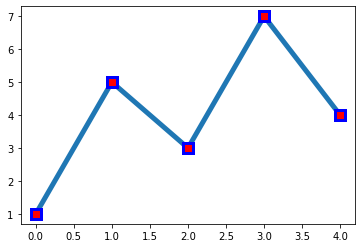

In [6]:
plt.plot([1,5,3,7,4], marker ='s', markersize = 10, 
         markerfacecolor = 'red', markeredgecolor = 'blue', 
         markeredgewidth = 3, linewidth = 5)

# Modulo 6.- Matplotlib 3

## 3.1. Anatomia de un gráfico
Un gráﬁco de matplotlib se puede  componer de muchas partes, cada  una representada por un tipo de  objeto particular, constituyendo una  jerarquía de objetos.
El más grande de ellos es la **ﬁgura**,  que puede contener uno o más  **subgráﬁcos** y estos a su vez pueden  contener otros objetos como **líneas,  puntos, leyendas**

Para controlar las propiedades de la ﬁgura se usa la  función **figure**. Esta función crea una nueva ﬁgura.  Cuando usamos solamente la función plot la ﬁgura  se crea implícitamente con los valores por defecto. Al  crearla explícitamente podemos controlar sus  parámetros, como por ejemplo el tamaño de la ﬁgura.

El parámetro **figsize** recibe una tupla de números  con las dimensiones de ancho y alto total de la ﬁgura  medido en pulgadas.

La interfaz de pyplot trabaja manteniendo un  registro de cuál es la ﬁgura activa, de modo que  las funciones que se invocan actúan sobre ella. Por ejemplo, si llamamos a la función plot  muchas veces seguidas actúan sobre el mismo  gráﬁco.

Para que actúen sobre ﬁguras distintas  hay que crear un nueva ﬁgura mediante **plt.figure()**.

Así podemos representar varios conjuntos de  datos en una o varias ﬁguras.

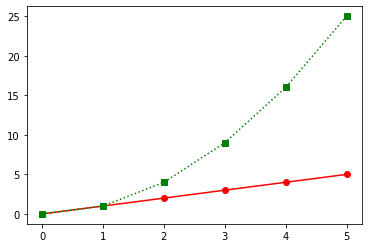

In [7]:
x = np.array([0, 1, 2, 3, 4, 5])
plt.plot(x, 'o-r')
plt.plot(x**2, 's:g')

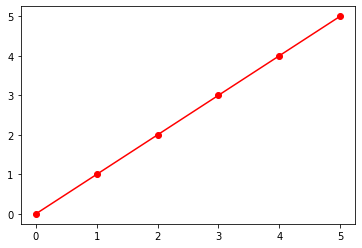

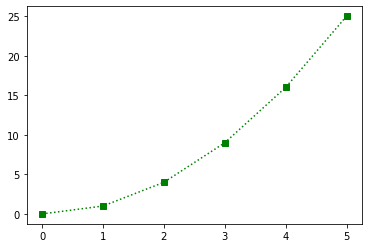

In [8]:
x = np.array([0, 1, 2, 3, 4, 5])
plt.plot(x, 'o-r')
plt.figure()
plt.plot(x**2, 's:g')

## 3.2. Otros elementos de un gráfico
Del mismo modo podemos agregar más elementos  siempre teniendo en cuenta que las funciones actúan  sobre la ﬁgura activa. Por ejemplo la **función title**  permite agregarle un título a la ﬁgura. Las **funciones  xlabel e ylabel** permiten deﬁnir el texto de los ejes.      
Si cada conjunto de datos tiene deﬁnido un label,  la **función legend** permite activar el recuadro de  leyendas. El label se deﬁne dentro de la función  que construye el gráﬁco con el parámetro del  mismo nombre.

No importa el orden en que se vayan llamando a  las distintas funciones.

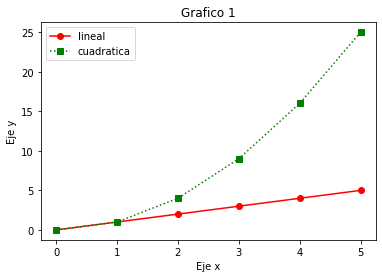

In [9]:
x = np.array([0, 1, 2, 3, 4, 5])
plt.plot(x, 'o-r', label = 'lineal')
plt.plot(x**2, 's:g', label = 'cuadratica')
plt.title('Grafico 1')
plt.xlabel('Eje x')
plt.ylabel('Eje y')
plt.legend()

# Modulo 6.- Matplotlib 4

## 4.1. Otros tipos de gráficos
Vimos que el módulo pyplot tiene numerosas  funciones para activar distintos elementos dentro  de un gráﬁco.      
También tiene varias funciones para  realizar distintos tipos de gráﬁcos.      
Hasta ahora solo vimos la función plot, pero  encontramos también las funciones **scatter,  hist, bar, barh, pie, violinplot, boxplot**. Con ellas vamos a poder representar  información de diversas

### 4.1.1. Gráficos de puntos - scatter plot.
La función **scatter** función permite graﬁcar puntos  en el plano donde además podemos controlar el  color y el tamaño de cada punto para representar  más información aparte de las coordenadas de los  puntos, como categorías o magnitudes continuas  asociadas a cada punto.

In [12]:
x, y = np.random.random((2, 30))  
c = np.random.randint(0, 9, 30)
s = np.random.randint(10, 150, 30)

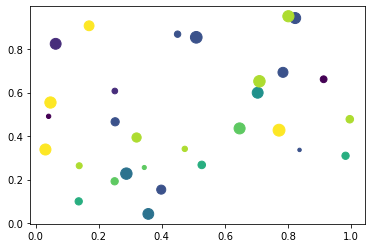

In [13]:
plt.scatter(x, y, c = c, s = s)

### 4.1.2. Histogramas.
Se pueden crear histogramas con la función **hist**.      
Este tipo de gráﬁcos es útil para apreciar la  distribución de números. Se conforma de barras  cuyo alto es la cantidad de datos que están entre los  valores determinados por el ancho de la barra.
Se puede controlar la cantidad de barras con el  parámetro **bins**. A su vez se puede hacer varios  histogramas en una misma ﬁgura y controlar cómo  se muestran juntas con el parámetro **histtype**.


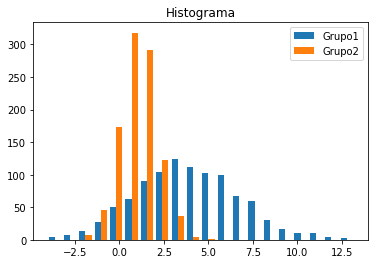

In [14]:
x1 = np.random.normal(4, 3, 1000)
x2 = np.random.normal(1, 1, 1000)
plt.hist((x1, x2), bins = 20, label = ['Grupo1', 'Grupo2'])
plt.title('Histograma')
plt.legend()

Text(0.5, 1.0, 'Histograma')

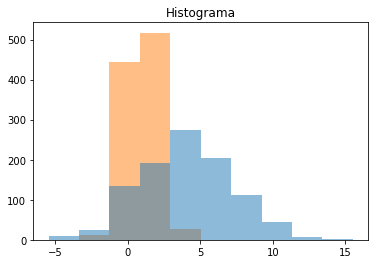

In [15]:
x1 = np.random.normal(4, 3, 1000)
x2 = np.random.normal(1, 1, 1000)
plt.hist((x1, x2), bins = 10, histtype = 'stepfilled', alpha = 0.5)
plt.title('Histograma')


### 4.1.3. Grafico de Barras.
Este tipo de gráﬁco permite visualizar cantidades mediante  barras en donde la longitud de cada barra es proporcional a la  magnitud que se quiere representar.       
Se suele utilizar para  representar información que pertenece a categorías distintas.
La función bar necesita dos parámetros x e y que representan  las posiciones de los centros de cada barra en el eje x y la  altura de cada barra en el eje y respectivamente. Así,  podemos poner barras en cualquier posición del eje x y con  cualquier altura. El ancho de las barras las podemos controlar  con el parámetro **width**.       
Las etiquetas del eje x se controlan  con **tick_label**.
La **función barh** permite hacer barras horizontales.

<BarContainer object of 3 artists>

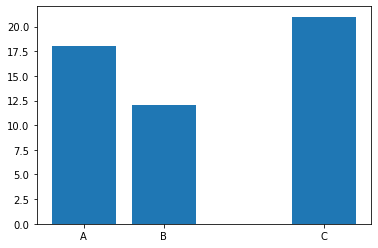

In [16]:
plt.bar([1, 2, 4], [18, 12, 21], tick_label = ['A', 'B', 'C'])

<BarContainer object of 3 artists>

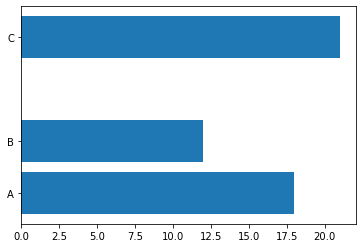

In [17]:
plt.barh([1, 2, 4], [18, 12, 21], tick_label = ['A', 'B', 'C'])

### 4.1.3. Grafico de Tortas - Pie.
Este tipo de gráﬁco es muy útil para mostrar las  proporciones relativas entre distintas cantidades  visualizándolas como cuñas de un mismo círculo.        
Se realizan con la **función pie** que toma las  magnitudes a representar.
Se le puede especiﬁcar el **parámetro labels** para  asignar textos a cada cuña. También está el  **parámetro explode**, que permite separar las  cuñas del centro del gráﬁco para destacar alguna  de ellas.

Text(0.5, 1.0, 'Gráfico de Torta')

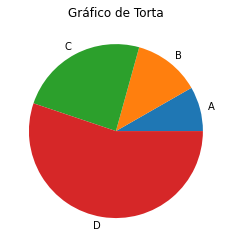

In [18]:
plt.pie([12, 18, 35, 80], labels = list('ABCD'))
plt.title('Gráfico de Torta')

Text(0.5, 1.0, 'Gráfico de Torta')

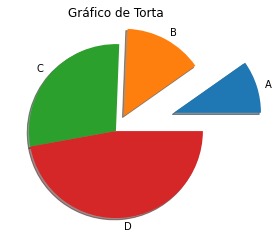

In [19]:
plt.pie([12, 18, 35, 58], labels = list('ABCD'),
       explode = [0.7, 0.2, 0, 0], shadow = True)
plt.title('Gráfico de Torta')

# Modulo 6.- Matplotlib 5

## 5.1. Subplots
En ciertas situaciones podemos querer representar varios  gráﬁcos dentro de la misma ﬁgura.      Podemos crear varios  plots dentro de la misma ﬁgura con la **función subplot**.
Esta función añade un subgráﬁco a la ﬁgura activa y  matplotlib queda enfocado en ese subplot, de modo que  las acciones que hagamos repercuten sobre ese  subgráﬁco. Para pasar a otro subgráﬁco debemos llamar a  subplot otra vez.
La función subplot toma la cantidad de ﬁlas y columnas en  las que deben acomodarse los subgráﬁcos. Por ejemplo,  dos ﬁlas y una columna conforman un gráﬁco sobre otro.
Dos ﬁlas y dos columnas conforman cuatro subgráﬁcos. El  tercer parámetro es el índice del subgráﬁco sobre el que  enfocarse.


Text(0.5, 1.0, 'Gráfico de Tortas')

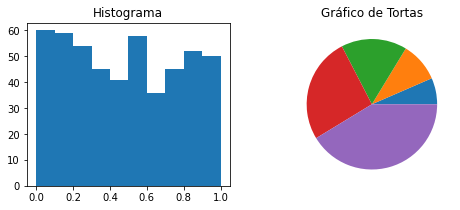

In [20]:
plt.figure(figsize = (8,3))
plt.subplot(1, 2, 1)
plt.hist(np.random.rand(500))
plt.title('Histograma')
plt.subplot(1, 2, 2)
plt.pie([6, 9, 15, 24, 38])
plt.title('Gráfico de Tortas')

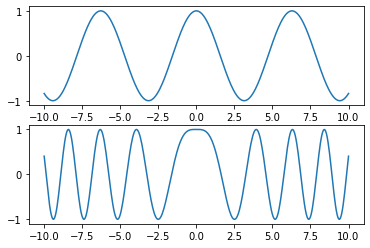

In [21]:
x = np.linspace(-10, 10, 400)
plt.figure(figsize = (6, 4))
plt.subplot(2, 1, 1)
plt.plot(x, np.cos(x))
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x * np.log(np.abs(x)+1)))

## 5.2. Interfaz orientada a objetos
Hasta ahora vimos que la interfaz pyplot  mantiene un registro de cuál es la ﬁgura activa  y las funciones que ejecutamos tienen efecto  sobre esa ﬁgura. Para que las funciones tengan  efecto en otra parte tenemos que activar una  nueva ﬁgura o subplot.
La interfaz orientada a objetos permite ponerle  nombre a los objetos como ﬁguras y subplots,  de modo que podamos referirnos a ellos en  cualquier parte y en cualquier orden. Y ahora  ya no vamos a trabajar con funciones sino con  métodos sobre esos objetos.

### 5.2.1. plt.subplots
Para crear estos objetos usamos la función subplots  (en plural) que crea una ﬁgura y uno o más subplots.  Debemos pasarle la cantidad de ﬁlas y columnas que  van a diagramar a los subplots (por defecto 1 y 1, es  decir, una ﬁgura con un subplot).

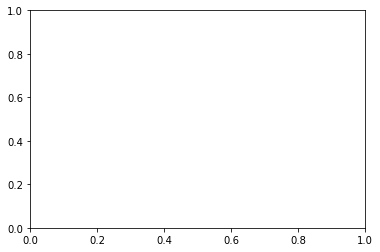

In [22]:
fig, ax = plt.subplots()

Si tenemos más de un subplot el segundo elemento es  un array que contiene a los objetos de cada subplot.

<class 'numpy.ndarray'> (2, 2)


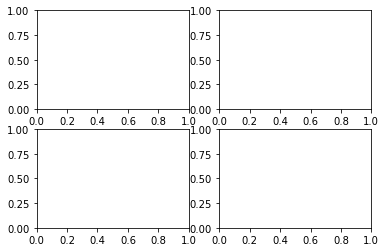

In [23]:
fig, axs = plt.subplots(2, 2)
print(type(axs), axs.shape)

### 5.2.3. Subplots
Al hacer subgráﬁcos tenemos que acceder  a cada objeto del array usando los índices  correspondientes.


<BarContainer object of 3 artists>

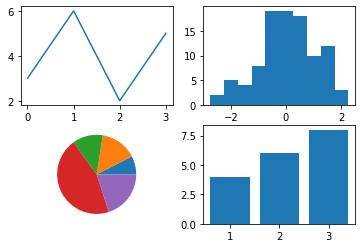

In [24]:
fig, axs = plt.subplots(2, 2)
axs[0,0].plot([3, 6, 2, 5])
axs[0,1].hist(np.random.randn(100))
axs[1,0].pie([3, 6, 5, 18, 8])
axs[1,1].bar([1, 2, 3], [4, 6, 8])
